C:\Users\marri\AppData\Local\Temp\ipykernel_16028\4202484319.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = results_df.pivot("Support", "Confidence", "Number of Rules")


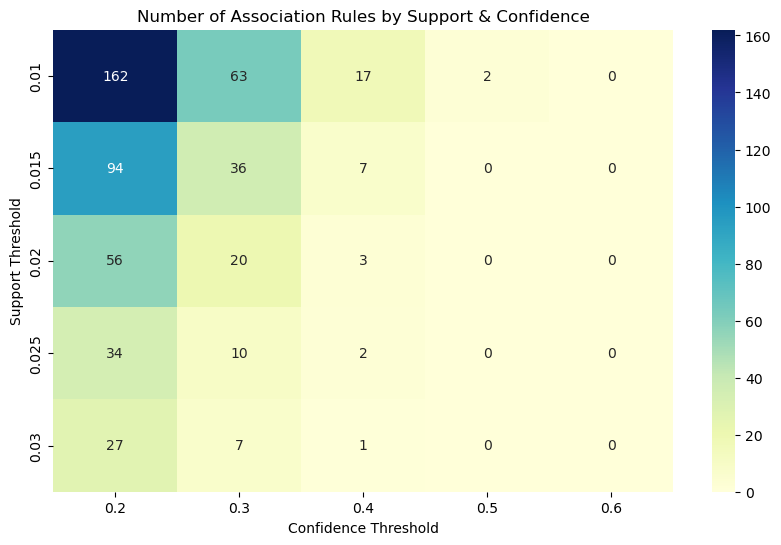

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
df = pd.read_excel("Online retail.xlsx")
transactions = df.iloc[:, 0].dropna().apply(lambda x: x.split(','))
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
support_levels = [0.01, 0.015, 0.02, 0.025, 0.03]
confidence_levels = [0.2, 0.3, 0.4, 0.5, 0.6]
results = []
for support in support_levels:
    frequent_itemsets = apriori(df_encoded, min_support=support, use_colnames=True)
    for confidence in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        results.append({
            'Support': support,
            'Confidence': confidence,
            'Number of Rules': len(rules)
        })
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
pivot = results_df.pivot("Support", "Confidence", "Number of Rules")
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Association Rules by Support & Confidence")
plt.xlabel("Confidence Threshold")
plt.ylabel("Support Threshold")
plt.show()

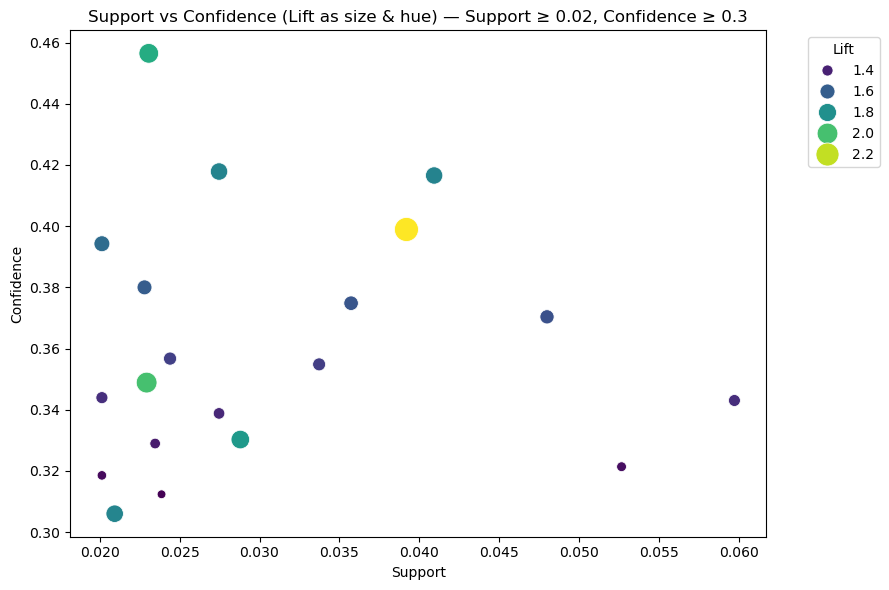

In [4]:
example_support = 0.02
example_confidence = 0.3
frequent_itemsets = apriori(df_encoded, min_support=example_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=example_confidence)
plt.figure(figsize=(9, 6))
sns.scatterplot(data=rules, x="support", y="confidence", size="lift", hue="lift", sizes=(40, 300), palette="viridis")
plt.title(f"Support vs Confidence (Lift as size & hue) — Support ≥ {example_support}, Confidence ≥ {example_confidence}")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(title="Lift", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
top_rules = rules.sort_values(by='lift', ascending=False).head(5)
print("Top 5 Interesting Rules by Lift:\n")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 Interesting Rules by Lift:

      antecedents      consequents   support  confidence      lift
8   (ground beef)      (spaghetti)  0.039200    0.398915  2.290857
18    (olive oil)      (spaghetti)  0.022933    0.348884  2.003547
14         (soup)  (mineral water)  0.023067    0.456464  1.915771
0       (burgers)           (eggs)  0.028800    0.330275  1.837585
19     (tomatoes)      (spaghetti)  0.020933    0.306043  1.757520
